# Google Colab Set Up and Installation of Modules  (Kurulum ve Gerekli Modullerin Yuklenmesi)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
import os

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import nltk
import os
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk

nltk.download('stopwords')
import matplotlib.pyplot as plt
import pandas as pd

nltk.download('punkt')
import string
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Importing Tweets for the theme under analysis (Incelenecek konu basligindaki tweetlerin yuklenmesi) 

This notebook analyzes the international relations (countries) themes, for the other themes you can look at their notebook files. (Burada ornek olarak ulkeler konu basligi gosteriliyor gosteriliyor.)

In [0]:
os.chdir("/content/gdrive/My Drive/css/ulkeler_after")
df3 = pd.read_csv("/content/gdrive/My Drive/css/ulkeler_after/ulkeler_after_nodublication.csv", engine = 'python')
df3['tweet'] = df3['tweet'].astype(str)

Data pre-processing (on temizlemesi):

1.   kucuk harfe cevirme
2.   turkce karakter uyumlarini duzeltme
3.   ozel karakterleri, noktalamalari temizleme


In [0]:
df3.tweet = df3.tweet.apply(lambda x: re.sub(r"İ", "i",x)) #harika calisiyor
df3.tweet = df3.tweet.apply(lambda x: x.lower())
df3.loc[:,"tweet"] = df3.tweet.apply(lambda x : " ".join(re.findall('[\w]+',x)))

In [0]:
df3.head(3)

,id,date,time,user_id,username,tweet,hashtags,retweet,user_rt,mentions
0,1247267826773241856,2020-04-06,23:59:57,2.860136e+09,elifaykrt,ab genel mahkemesi türkiye de de dava konusu o...,[],False,NaN,[]
1,1247267742790680576,2020-04-06,23:59:37,4.060571e+09,sau_diam,avrupa birliği ülkelerinde covid 19 tablosunda...,"['#ab', '#eu', '#covid19', '#diam2020']",False,NaN,[]
2,1247267699375386625,2020-04-06,23:59:27,1.487377e+09,gokceab,parmağa yara bandı sardıktan az sonra o el mut...,[],False,NaN,[]


# I implemend NLP pipelines. Namely: Tokenization, stopwords removal. Later on I did frequency analysis of the words before and after the covid period.

(Tokenize islemi, stop wordlerin atilmasi ve kelime frequencylerini (kullanim sayilarini) ileride gelecek gorsellestirme icin kaydetme)

In [0]:
top_N = 10


txt = df3.tweet.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

user_defined_stop_words = ['1', 'ye', 'nin' ,'nın',  'koronavirüs', 'olsun', 'karşı' , 'covid_19', 'artık', '3', 'sayısı' , 'olarak', 'oldu', 'olan', '2' , 'nedeniyle','bile' , 'sonra' ,'sen','virüs', 'ben', 'vaka' , 'son', 'yeni', 'sayi', 'sayisi','virüsü','bir','com','twitter', 'kadar', 'dan' , 'değil' ,'pic' , 'http', 'https' , 'www' , 'status' , 'var', 'bi', 'mi','yok', 'bu' , 've', 'korona' ,'corona' ,'19' ,'kovid', 'covid'] 

i = nltk.corpus.stopwords.words('turkish')
j = list(string.punctuation) + user_defined_stop_words
stopwords = set(i).union(j)


words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt3 = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt3)
print('=' * 60)

rslt3 = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

All frequencies, including STOPWORDS:
      Word  Frequency
0  almanya     121969
1       ve     107393
2      com     102602
3       da     102143
4      bir      83882
5  twitter      76648
6       bu      73845
7    rusya      68164
8       de      62263
9    https      59990


# Importing tweets which are before the Turkish first case.  (TR deki ilk vakan onceki tweetlerin incelenmek icin yuklenmesi)

In [0]:
df2 = pd.read_csv("/content/gdrive/My Drive/css/ulkeler_before/ulkeler_before_nodublication.csv", engine = 'python')

df2['tweet'] = df2['tweet'].astype(str)

In [0]:
df2['tweet'] = df2['tweet'].astype(str)
df2.tweet = df2.tweet.apply(lambda x: re.sub(r"İ", "i",x)) #harika calisiyor
df2.tweet = df2.tweet.apply(lambda x: x.lower())
df2.loc[:,"tweet"] = df2.tweet.apply(lambda x : " ".join(re.findall('[\w]+',x)))

In [0]:
df2.head()

,id,date,time,user_id,username,tweet,hashtags,retweet,user_rt,mentions
0,1237120935884398592,2020-03-09,23:59:50,2.490543e+09,netinternethabe,dsö koronavirüs pandemi tehdidi gerçek oldu ht...,[],False,NaN,[]
1,1237120358597242884,2020-03-09,23:57:32,4.893352e+08,prbs007,dsö ülkelerin gerçek rakamları açıklamayıp giz...,[],False,NaN,['kemalozfirat']
2,1237119821164183554,2020-03-09,23:55:24,7.424910e+17,izmitli_serkan,dsö den açıklama bu savaşı kazanabiliriz https...,[],False,NaN,[]
3,1237119277964148737,2020-03-09,23:53:15,8.186996e+08,eskiacik_1903,dsö sağolsun hocam çin in verilerin kabul etti...,[],False,NaN,['timbooth75']
4,1237118560977203200,2020-03-09,23:50:24,1.416370e+09,meraldemirel4,dsö iran a gidip koronayla mücadelede iran ın ...,[],False,NaN,"['xc0ms', 'traderat12']"


All frequencies, including STOPWORDS:
      Word  Frequency
0  türkiye     257249
1    rusya     241633
2      com     185038
3       ve     182863
4      bir     150601
5  twitter     135921
6       de     125635
7       bu     122169
8       da     105363
9    https      95717


<Figure size 2160x2160 with 0 Axes>

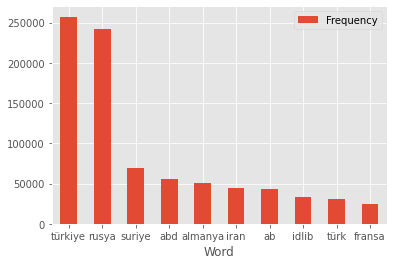

In [0]:
top_N = 10


txt = df2.tweet.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

user_defined_stop_words = ['1', 'ye', 'nin' ,'nın',  'koronavirüs', 'olsun', 'karşı' , 'covid_19', 'artık', '3', 'sayısı' , 'olarak', 'oldu', 'olan', '2' , 'nedeniyle','bile' , 'sonra' ,'sen','virüs', 'ben', 'vaka' , 'son', 'yeni', 'sayi', 'sayisi','virüsü','bir','com','twitter', 'kadar', 'dan' , 'değil' ,'pic' , 'http', 'https' , 'www' , 'status' , 'var', 'bi', 'mi','yok', 'bu' , 've', 'korona' ,'corona' ,'19' ,'kovid', 'covid'] 

i = nltk.corpus.stopwords.words('turkish')
j = list(string.punctuation) + user_defined_stop_words
stopwords = set(i).union(j)


words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')
plt.figure(figsize=(30,30))
rslt.plot.bar(rot=0)
plt.savefig('ulkeler_before.png')

# Comparative visualization (Karsilastirmali gorsellestirme (Ayni konu basliklarinin 11 marttan oncesi ve sonrasi )

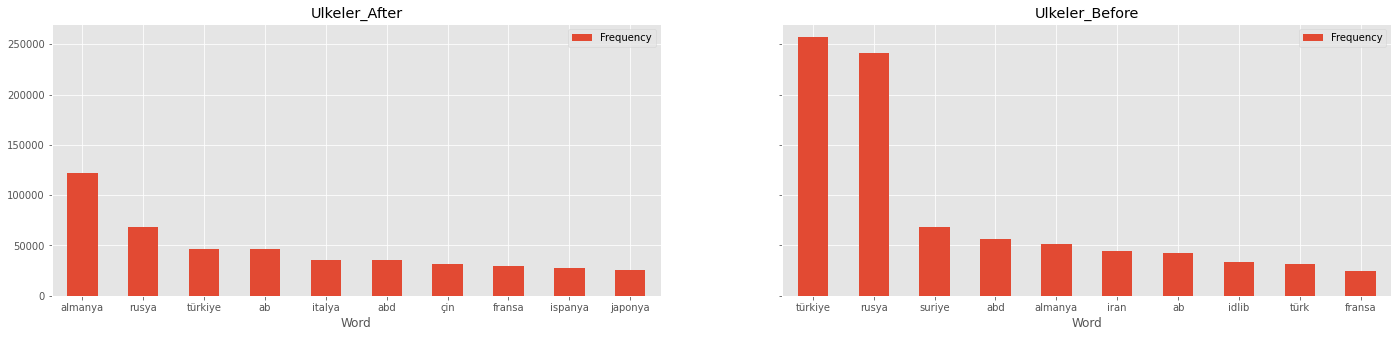

In [0]:
fig, (ax1, ax2) =  plt.subplots(1,2, sharex=False, sharey= True, figsize=(24,5)) 
rslt3.plot.bar(rot=0, ax =ax1 , title = "Ulkeler_After" )
rslt.plot.bar(rot=0, ax =ax2 , title = "Ulkeler_Before" )
plt.savefig('ulkeler_comparison.png',dpi=300)